In [8]:
from struct import *

In [9]:
import numpy as np

In [10]:
import math

In [11]:
from matplotlib import pyplot as plt

In [12]:
from PIL import Image

In [13]:
%store -r

In [14]:
%store

Stored variables and their in-db values:
filename                   -> '/home/roberta/Documents/SlowMos/TSPO/cache/oFlowO
filenameRev                -> '/home/roberta/Documents/SlowMos/TSPO/cache/oFlowO
imFilename                 -> 'flowrgbDF07.jpg'
resultFileName             -> 'freds01.jpg'


In [15]:
flow_file = open(filename)

In [16]:
flow_data = flow_file.read()

In [17]:
size = len(flow_data)

In [18]:
Nfloats = (size-16)/4

In [19]:
unpack('8c',flow_data[0:8])

('f', 'l', 'o', 'w', '_', 's', 'V', '\x01')

In [20]:
width,height = unpack('2i',flow_data[8:16])

In [21]:
forms = str(Nfloats)+'f'

In [22]:
them = np.reshape(unpack(forms,flow_data[16:16+4*Nfloats]),(height,width,2))

In [23]:
they = np.dstack((them,np.zeros((height,width))))

In [59]:
def modulos(a):
    xf = a[0]*32;
    xmsb = math.floor(xf / 256);
    xlsb = xf - xmsb * 256;
    yf = a[1]*32;
    ymsb = math.floor(yf / 256);
    ylsb = yf - ymsb * 256;
    return [xlsb,128+xmsb,ylsb,128+ymsb]

In [60]:
mu = 200.0

In [61]:
clampet = np.apply_along_axis(modulos,2,they)

In [62]:
clampet[1020,28]

array([  69.31809998,  127.        ,   19.95761108,  129.        ])

In [63]:
they[1020,28]

array([-5.83380938,  8.62367535,  0.        ])

In [64]:
im = Image.fromarray(clampet.astype('uint8'))

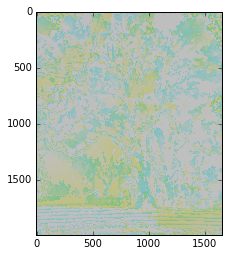

In [65]:
plt.imshow(im)

In [245]:
im.save(imFilename)